In [1]:
from matplotlib import rc
rc('animation', html='jshtml')
from math import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.animation as animation
def dist_angulos(angulo1,angulo2):
  diff = (angulo2 - angulo1) % (2 * np.pi)
  return diff if diff <= np.pi else (2 * np.pi - diff)
  #Si la diferencia es mayor que pi, entonces se devuelve la 
  #diferencia entre 2*pi y la diferencia calculada en la primera línea, 
  #ya que es más corto dar la vuelta completa alrededor del círculo en la dirección opuesta.
  return dife
def pci(x, y, l1, l2):
  #Se hacen todas las cuentas en base a las transparencias
    COSQ2 = (x**2+y**2-l1**2-l2**2)/(2*l1*l2)
    SINQ2  = np.sqrt(1- COSQ2**2)
    q2 = np.arctan2(SINQ2, COSQ2)

    gamma1 = np.arctan2(y,x)
    beta1 = np.arctan2(l2*SINQ2,l1+l2*COSQ2)
    q1 = gamma1-beta1
   
    return q1,q2

def pci2(x, y, l1, l2):
    D = (x**2+y**2-l1**2-l2**2)/(2*l1*l2)
    S = np.sqrt(1-D**2)
    q2_1 = np.arctan2(S, D)
    q2_2 = np.arctan2(-S, D)
    gamma1 = np.arctan2(y,x)
    beta1 = np.arctan2(l2*S,l1+l2*D)
    q1_1 = gamma1-beta1
    gamma2 = np.arctan2(y,x)
    beta2 = np.arctan2(-l2*S,l1+l2*D)
    q1_2 = gamma2-beta2 
    return [(q1_1, q2_1), (q1_2, q2_2)]



def pcd(q1, q2, l1, l2):
  # calcular las coordenadas x e y del extremo del robot
  x = l1*np.cos(q1) + l2*np.cos(q1 + q2)
  y = l1*np.sin(q1) + l2*np.sin(q1 + q2)
  return (x, y)

def animacion_trayectoria_pcd(q1s, q2s, l1, l2, pi, pd, pa,pf):

    fig = plt.figure(figsize=(8,6))
    ax = plt.axes()
    n = min(len(q1s), len(q2s))
    
    
    # inicializar la lista de coordenadas
    global coords
    coords = []
    # calcular las coordenadas para cada par de ángulos de giro
    for q1, q2 in zip(q1s, q2s):
        x, y = pcd(q1, q2, l1, l2)
        coords.append((x, y))
    # establecer los límites del gráfico
    global max_length
    max_length = l1 + l2 + 1
    global x_coords, y_coords
    x_coords = []
    y_coords = []
    
    global q1s_cop, q2s_cop
    q1s_cop = q1s.copy()
    q2s_cop = q2s.copy()
    def dibujar_trayectoria_pcd_mod(w):
      global q1s_cop
      global q2s_cop
      ax.clear()
      
      ax.set_xlim(-max_length, max_length)
      ax.set_ylim(-max_length, max_length)
      # x_coords, y_coords
      # dibujar la trayectoria
      elem = coords.pop(0)
      x_coords.append(elem[0])
      y_coords.append(elem[1])

      x0, y0 = 0, 0 # Posición de la articulación 1
      x1, y1 = pcd(q1s_cop[0], 0, l1, 0) # Posición de la articulación 2
      x2, y2 = pcd(q1s_cop[0], q2s_cop[0], l1, l2) # Posición del extremo del robot
      x, y = [x0, x1, x2], [y0, y1, y2] # Coordenadas de la trayectoria
      #Se van borrando los qs que se tomen
      q1s_cop = np.delete(q1s_cop,0)
      q2s_cop = np.delete(q2s_cop,0)

      ax.plot(x, y, "k") # Traza la trayectoria
      ax.plot(x0, y0, "k.") # Dibuja la articulación 1
      ax.plot(x1, y1, "k.") # Dibuja la articulación 2
      ax.scatter(pi[0],pi[1], s=10)
      ax.scatter(pd[0],pd[1], s=10)
      ax.scatter(pa[0],pa[1], s=10)
      ax.scatter(pf[0],pf[1], s=10)
      plot = ax.plot(x_coords, y_coords)
      #DIBUJO DEL ROBOT con los dos ultimos angulos de q1s y q2s
      

      # mostrar el gráfico
      #plt.show()
      return plot

    
    plt.close(fig)

    anim = animation.FuncAnimation(fig, dibujar_trayectoria_pcd_mod, frames=n-1,  blit=False, repeat=True)
    return anim





In [2]:
####Antes de comenzar con la práctica, se va a implementar una función que hará uso de la función PCI implementada en la práctica 2
####para calcular las variables de articulación en los distintos puntos

# def trayec(pI, pD, pA, pF, l1,l2):

#   q1_1, q2_1  = pci(pI[0], pI[1], l1,l2)
#   q1_2, q2_2  = pci(pD[0], pD[1], l1,l2)
#   q1_3, q2_3  = pci(pA[0], pA[1], l1,l2)
#   q1_4, q2_4  = pci(pF[0], pF[1], l1,l2)

#   return np.array([q1_1,q2_1]), np.array([q1_2,q2_2]),np.array([q1_3,q2_3]),np.array([q1_4,q2_4])

In [3]:
# pI = np.array([1,0])
# pD = np.array([1,0.1])
# pA = np.array([1.5,0.1])
# pF = np.array([1.5,0])

# # pI = np.array([1,0])
# # pD = np.array([1,4])
# # pA = np.array([4,4])
# # pF = np.array([4,0])

# l1 = l2 = 4

# prim, sec, ter, cuar = trayec(pI, pD, pA, pF, l1, l2)


# q1s_1 = np.linspace(prim[0], sec[0], 10)
# q2s_1 = np.linspace(prim[1], sec[1], 10)

# q1s_2 = np.linspace(sec[0], ter[0], 10)
# q2s_2 = np.linspace(sec[1], ter[1], 10)

# q1s_3 = np.linspace(ter[0], cuar[0], 10)
# q2s_3 = np.linspace(ter[1], cuar[1], 10)

# q1s = np.concatenate((q1s_1, q1s_2, q1s_3))
# q2s = np.concatenate((q2s_1, q2s_2, q2s_3))
# #animacion_trayectoria_pcd(q1s, q2s, l1, l2)

In [4]:


# #Pci modificado, se toma la versión negativa del seno
# # def pci(x, y, l1, l2):
# #     D = (x**2+y**2-l1**2-l2**2)/(2*l1*l2)
# #     S = np.sqrt(1-D**2)
# #     q2_1 = np.arctan2(S, D)
# #     q2_2 = np.arctan2(-S, D)
# #     gamma1 = np.arctan2(y,x)
# #     beta1 = np.arctan2(l2*S,l1+l2*D)
# #     q1_1 = gamma1-beta1
# #     gamma2 = np.arctan2(y,x)
# #     beta2 = np.arctan2(-l2*S,l1+l2*D)
# #     q1_2 = gamma2-beta2 
# #     return [(q1_1, q2_1), (q1_2, q2_2)]



# #Se le pasan todos los parametros directamente
# def dibujar_robot(q1,q2, l1, l2, x, y):
#   x0, y0 = 0, 0 # Posición de la articulación 1

#   # qs= pci(x, y, l1, l2) # Posición de la articulación 2
#   # q1s = qs[0]
#   # q2s = qs[1]

#   # if(q1s[0] - q1_ant > q1s[1] - q1_ant):
#   #   q1 = q1s[1]
#   # else:
#   #   q1 = q1s[0]
#   # if(q2s[0] - q2_ant > q2s[1] - q2_ant):
#   #   q2 = q2s[1]
#   # else:
#   #   q2 = q2s[0]

#   x1 = l1*np.cos(q1)
#   y1 = l1*np.sin(q1)
#   x2, y2 = x, y # Posición del extremo del robot
#   x, y = [x0, x1, x2], [y0, y1, y2] # Coordenadas de la trayectoria
#   plt.plot(x, y, "k") # Traza la trayectoria
#   plt.plot(x0, y0, "k.") # Dibuja la articulación 1
#   plt.plot(x1, y1, "k.") # Dibuja la articulación 2


# def dibujar_trayectoria_pci(x1s, x2s, l1, l2,solu):
#   # inicializar la lista de coordenadas
#   coords = []
#   # calcular las coordenadas para cada par de ángulos de giro
#   qs = []
#   q_prim = []
#   q_sec = []

#   q_def = []
#   q1_def = []
#   q2_def = []
#   for x1, x2 in zip(x1s, x2s):
#       qs.append(pci(x1,x2,l1,l2))
#       coords.append((x1, x2))
#   for q in qs:
#     q_prim.append(q[0]) #primer par
#     q_sec.append(q[1])  #segundo par
#   prim = True
#   for u, v in zip(q_prim, q_sec):
#     if(prim):
#       prim = False
#       # rand = np.random.randint(0,2)
#       #Si es la primera iteración, se añade el par que se haya indicado como parámetro y se guarda como q_ant
#       if(solu == 0):
#         q_def.append(u)
#         q_ant = u
#       else:
#         q_def.append(v)
#         q_ant = v
#       # q1_def.append(q[rand])
#       # q2_def.append()
#       # q1_ant = q[rand]
#     #Si no, se calculan la distancia entre q1_ant y q1 y entre q2_ant y q2 para los dos pares de soluciones y se toma el que sume menos
#     else:
#       dist1 = np.array([dist_angulos(q_ant[0],u[0]), dist_angulos(q_ant[1],u[1])])
#       dist2 = np.array([dist_angulos(q_ant[0],v[0]), dist_angulos(q_ant[1],v[1])])
#       if (dist1.sum(axis=0) > dist2.sum(axis=0)):
#         q_def.append(v)
#         q_ant = v
#       else:
#         q_def.append(u)
#         q_ant = u
#       # if(abs(q1[0] - q1_ant) > abs(q1[1] - q1_ant)):
#       #   q1_def.append(q1[1])
#       #   q1_ant = q1[1]
#       # else:
#       #   q1_def.append(q1[0])
#       #   q1_ant = q1[0]
#   # prim = True
#   # for q2 in q2s:
#   #   print(q2)
#   #   if(prim):
#   #     prim = False
#   #     rand = np.random.randint(0,1)
#   #     q2_def.append(q2[rand])
#   #     q2_ant = q2[rand]
#   #   else:
#   #     if(abs(q2[0] - q2_ant) > abs(q2[1] - q2_ant)):
#   #       q2_def.append(q2[1])
#   #       q2_ant = q2[1]
#   #     else:
#   #       q2_def.append(q2[0])
#   #       q2_ant = q2[0]
#   # print(q1_def)
#   # print(q2_def)



#   # establecer los límites del gráfico
#   max_length = l1 + l2 + 1
#   plt.xlim(-max_length, max_length)
#   plt.ylim(-max_length, max_length)
#   # dibujar la trayectoria
#   x_coords, y_coords = zip(*coords)
#   plt.plot(x_coords, y_coords)
#   #DIBUJO DEL ROBOT con los dos ultimos angulos de q1s y q2s
#   dibujar_robot(q_def[-1][0], q_def[-1][1], l1, l2, x_coords[-1], y_coords[-1])
#   # mostrar el gráfico
#   plt.show()


# #Para esta, la comprobación de cuál es la mejor solución en cada momento
# #se hace en la llamada recursiva a dibujar_trayectoria_pci_mod
# #para ello se crean diversas variables globales
# def animacion_trayectoria_pci(xs, ys, l1, l2, solu):

#     fig = plt.figure(figsize=(8,6))
#     ax = plt.axes()
#     n = min(len(xs), len(ys))
    
#     # inicializar la lista de coordenadas
#     global coords
#     coords = []
#     # calcular las coordenadas para cada par de ángulos de giro
#     for x, y in zip(xs, ys):
#         coords.append((x, y))
#     # establecer los límites del gráfico
#     global max_length
#     max_length = l1 + l2 + 1
#     global x_coords, y_coords
#     x_coords = []
#     y_coords = []

#     #Variables globales para ir guardando todo
#     global q1s, q2s, q_def, q_ant
#     q1s = []
#     q2s = []
#     q_def = []

#     #Global para ver si es la primera iteración
#     global primero
#     primero = True
    
#     def dibujar_trayectoria_pci_mod(w):
#       global q1s, q2s, q_def, q_ant
#       global primero
#       ax.clear()
      
#       ax.set_xlim(-max_length, max_length)
#       ax.set_ylim(-max_length, max_length)
#       # x_coords, y_coords
#       # dibujar la trayectoria
#       elem = coords.pop(0)
#       x_coords.append(elem[0])
#       y_coords.append(elem[1])

      
#       x0, y0 = 0, 0 # Posición de la articulación 1
#       qs = pci(x_coords[-1], y_coords[-1], l1, l2) # Posición de la articulación 2
#       q_prim = qs[0]
#       q_sec = qs[1]

#       if(primero):
#         #Si es la primera iteración (llamada a la función), se toma la solución que se indique como parámetro
#         primero = False
#         # rand = np.random.randint(0,2)
#         if(solu == 0):
#           q_def.append(q_prim)
#           q_ant = q_prim
#         else:
#           q_def.append(q_sec)
#           q_ant = q_sec
#         # rand = np.random.randint(0,2)
#         # q1  = q1_2[rand]
#         # q2  = q2_2[rand]
#         # q1s.append(q1)
#         # q2s.append(q2)

#       #En caso de que no se compara con la anterior como ya se ha indicado en esta práctica
#       else:
#         dist1 = np.array([dist_angulos(q_ant[0],q_prim[0]), dist_angulos(q_ant[1],q_prim[1])])
#         dist2 = np.array([dist_angulos(q_ant[0],q_sec[0]), dist_angulos(q_ant[1],q_sec[1])])
#         if(dist1.sum(axis=0) > dist2.sum(axis=0)):
#           q_def.append(q_sec)
#           q_ant = q_sec
#         else:
#           q_def.append(q_prim)
#           q_ant = q_prim
#         # if(dist_angulos(q_prim[0],q_ant[0]) > dist_angulos(q_sec[0],q_ant[0]):
#         #   q1 = q1_2[1]
#         #   q1s.append(q1)
#         # else:
#         #   q1 = q1_2[0]
#         #   q1s.append(q1)
#         # if(abs(q2_2[0] - q2s[-1]) > abs(q2_2[1] - q2s[-1])):
#         #   q2 = q2_2[1]
#         #   q2s.append(q2)
#         # else:
#         #   q2 = q2_2[0]
#         #   q2s.append(q2)

#       #Se dibuja el robot directamente sin llamar a la función
#       x1 = l1*np.cos(q_def[-1][0])
#       y1 = l1*np.sin(q_def[-1][0])
#       x2, y2 = x_coords[-1], y_coords[-1] # Posición del extremo del robot
#       x, y = [x0, x1, x2], [y0, y1, y2] # Coordenadas de la trayectoria
#       x, y = [x0, x1, x2], [y0, y1, y2] # Coordenadas de la trayectoria

#       ax.plot(x, y, "k") # Traza la trayectoria
#       ax.plot(x0, y0, "k.") # Dibuja la articulación 1
#       ax.plot(x1, y1, "k.") # Dibuja la articulación 2
#       plot = ax.plot(x_coords, y_coords)
#       #DIBUJO DEL ROBOT con los dos ultimos angulos de q1s y q2s
      

#       # mostrar el gráfico
#       #plt.show()
#       return plot

#     plt.close(fig)

#     anim = animation.FuncAnimation(fig, dibujar_trayectoria_pci_mod, frames=n-1,  blit=False, repeat=True)
#     return anim, q1s, q2s



In [5]:
# def recta(x,x1,y1,x2,y2):
#   m = (y2-y1)/(x2-x1)
#   return m*(x-x1)+y1

# l1 = l2 = 4
# x1 = np.linspace(1,1,50)
# y1 = np.linspace(0,4,50)

# x2 = np.linspace(1,5,50)
# y2 = recta(x2, 1, 4, 5, 4)

# x3 = np.linspace(5,5,50)
# y3 = np.linspace(4,0,50)

# xs = np.concatenate((x1,x2,x3))
# ys = np.concatenate((y1,y2,y3))

# #anim, x, y = animacion_trayectoria_pci(xs,ys,l1,l2, 1)
#anim

In [6]:
# def dibujar_robot(q1, q2, l1, l2):
#   x0, y0 = 0, 0 # Posición de la articulación 1
#   x1, y1 = pcd(q1, 0, l1, 0) # Posición de la articulación 2
#   x2, y2 = pcd(q1, q2, l1, l2) # Posición del extremo del robot
#   x, y = [x0, x1, x2], [y0, y1, y2] # Coordenadas de la trayectoria
#   plt.plot(x, y, "k") # Traza la trayectoria
#   plt.plot(x0, y0, "k.") # Dibuja la articulación 1
#   plt.plot(x1, y1, "k.") # Dibuja la articulación 2
# def dibujar_trayectoria_pcd(q1s, q2s, l1, l2):
#   # inicializar la lista de coordenadas
#   pruebax = []
#   pruebay = []
#   coords = []
#   # calcular las coordenadas para cada par de ángulos de giro
#   for q1, q2 in zip(q1s, q2s):
#       x, y = pcd(q1, q2, l1, l2)
#       pruebax.append(x)
#       pruebay.append(y)
#       coords.append((x, y))
#   # establecer los límites del gráfico
#   max_length = l1 + l2 + 1
#   plt.xlim(-max_length, max_length)
#   plt.ylim(-max_length, max_length)
#   # dibujar la trayectoria
#   x_coords, y_coords = zip(*coords)
#   plt.plot(x_coords, y_coords)
#   #DIBUJO DEL ROBOT con los dos ultimos angulos de q1s y q2s
#   dibujar_robot(q1s[-1], q2s[-1], l1, l2)

#   #Se devuelve la trayectoria para después corroborar el correcto comportamiento de la cinemática inversa
#   return pruebax, pruebay
#   # mostrar el gráfico
#   # plt.show()

# EJERCICIO 1

Implemente una función en Python que calcule los coeficientes de los tres
polinomios que definen una trayectoria 4-3-4 para una articulación concreta, a
partir de los valores de la articulación, [pI , pD, pA, pF ], y de los tiempos totales de cada segmento, [t1, t2, t3]. La función debe tener la siguiente interfaz:


```
def trayectoria434(qI, qD, qA, qF, t1, t2, t3)
  <código de la función>
  return (f1, f2, f3)
```

donde:
qI, qD, qA y qF son los valores de la articulación en los puntos de inicio
(pI ), despegue (pD), asentamiento (pA) y fin (pF )

t1, t2 y t3 es la duración de cada segmento.

f1, f2 y f3 son vectores con los coeficientes de cada segmento de la trayectoria, esto es, f1 = [c14, c13, c12, c11, c10], f2 = [c23, c22, c21, c20] y f3 = [c34, c33, c32, c31, c30].

In [7]:
def trayectoria434(qI, qD, qA, qF, t1, t2, t3):
  shape = (7, 7)

  #Variables ya conocidas
  v_ini = 0
  a_ini = 0
  v_fin = 0
  a_fin = 0

  #Cada uno de los polinomios que se van a devolver
  f1 = np.zeros(5)
  f2 = np.zeros(4)
  f3 = np.zeros(5)

  #Coeficientes ya conocidos
  f1[0] =  qI
  f1[1] = v_ini*t1
  f1[2] = (a_ini*(t1**2))/2

  f2[0] = qD

  f3[0] = qF
  f3[1] = v_fin*t3
  f3[2] = (a_fin*(t3**2))/2

  #Matriz que se define en el guión de la práctica
  matrix = np.array([[1,1,0,0,0,0,0],
                     [3/t1,4/t1,-1/t2,0,0,0,0],
                     [6/(t1**2),12/(t1**2),0,-2/(t2**2),0,0,0],
                     [0,0,1,1,1,0,0],
                     [0,0,0,0,0,-1,1],
                     [0,0,1/t2,2/t2,3/t2,-3/t3,4/t3],
                     [0,0,0,2/(t2**2),6/(t2**2),6/(t3**2),-12/(t3**2)]])
  y = np.array([qD-qI - (a_ini*(t1**2))/2-v_ini*t1,
                -a_ini*t1 - v_ini,
                -a_ini,
                qA-qD,
                 qA-qF-(a_fin*(t3**2))/2 + v_fin*t3,
                 -a_fin*t3 + v_fin,
                 a_fin])
  
  resultado = np.linalg.inv(matrix)@y

  #Coeficientes calculados a partir de la matriz
  f1[3] = resultado[0]
  f1[4] = resultado[1]

  f2[1] = resultado[2]
  f2[2] = resultado[3]
  f2[3] = resultado[4]

  f3[3] = resultado[5]
  f3[4] = resultado[6]

  f1 = f1[::-1]
  f2 = f2[::-1]
  f3 = f3[::-1]
  return f1,f2,f3



# EJERCICIO 2

Implemente un script en Python que represente, en espacio cartesiano, una
trayectoria 4-3-4 de un manipulador RR cuyos brazos, l1 y l2, tienen longitud
1. La trayectoria debe pasar por los siguientes puntos:
Punto de inicio → [1, 0]
Punto de despegue → [1, 0,1].
Punto de asentamiento → [1,5, 0,1].
Punto de fin → [1,5, 0].


Tenga en cuenta que debe calcular la trayectoria en el espacio de las articula-
ciones. Por tanto debe seguir los siguientes pasos:
1. Calcular los valores de las articulaciones en los puntos de la ruta (problema cinemático inverso). Use la función pci de la práctica 2.
2. Para cada articulación, definir una función que "pase" por los valores
de la articulación correspondientes a los puntos de la ruta. En este caso
(trayectoria 4-3-4) será una función definida a trozos. Haga uso de la
función trayectoria434 implementada en el ejercicio anterior y suponga
una duración de cada segmento de la trayectoria de t1 = t2 = t3 = 1 s.
3. Para cada articulación, muestree la función definida en el paso anterior
durante 3 segundos con un periodo de muestreo de 0,05 segundos. Tenga
en cuenta el cambio de variable realizado.
4. A partir de los valores de las variables de articulación obtenidos en
el paso anterior, represente la trayectoria en espacio cartesiano (im-
plica resolver el problema cinemático directo). Haga uso de la función
animacion_trayectoria_pcd de la práctica 2.
A la vista de la representación de la trayectoria, ¿se ajusta a lo esperado?,
¿pasa por los puntos de la ruta?

In [8]:
#La longitud de cada brazo del robot es 1
l1 = l2 = 1

#El tiempo 1,2,3 es igual a 1
t1 = t2 = t3 = 1

#Un instante de tiempo se define como 0.05s
T = 0.05

pares_posibles = []

#Puntos propuestos en clase para poder visualizar mejor la trayectoria
pI = [-1.5,0]
pD = [-1.5,1]
pA = [1.5,1]
pF = [1.5,0]
# pI = [1,0]
# pD = [1,0.1]
# pA = [1.5,0.1]
# pF = [1.5,0]

# qI_1, qI_2 = pci(pI[0],pI[1],l1,l2)
# qD_1, qD_2 = pci(pD[0],pD[1],l1,l2)
# qA_1, qA_2 = pci(pA[0],pA[1],l1,l2)
# qF_1, qF_2 = pci(pF[0],pF[1],l1,l2)
pares_posibles.append(pci2(pI[0],pI[1],l1,l2))
pares_posibles.append(pci2(pD[0],pD[1],l1,l2))
pares_posibles.append(pci2(pA[0],pA[1],l1,l2))
pares_posibles.append(pci2(pF[0],pF[1],l1,l2))

#La selección de los pares de variables de articulación para cada punto de la trayectoria se hace devolviendo la que posea una suma de distancias
#de q1_ant a q1 y de q2_ant a q2 menor. Ini indica el par inicial, puede ser 0 o 1
def seleccion_qs(ini, pares):
  devolver = []
  for i,par in enumerate(pares):
    if i==0:
      devolver.append(pares[i][ini])
    else:
      dist1 = np.array([dist_angulos(devolver[i-1][0],par[0][0]), dist_angulos(devolver[i-1][1],par[0][1])])
      dist2 = np.array([dist_angulos(devolver[i-1][0],par[1][0]), dist_angulos(devolver[i-1][1],par[1][1])])
      if(dist1.sum(axis=0) > dist2.sum(axis=0)):
          devolver.append(par[1])  
      else:
          devolver.append(par[0])  
  return devolver

pares = seleccion_qs(1,pares_posibles)

#Se asignan los valores
qI_1 = pares[0][0]
qI_2 = pares[0][1]
qD_1 = pares[1][0]
qD_2 = pares[1][1]
qA_1 = pares[2][0]
qA_2 = pares[2][1]
qF_1 = pares[3][0]
qF_2 = pares[3][1]

f1_1, f2_1, f3_1 = trayectoria434(qI_1, qD_1, qA_1, qF_1, t1, t2, t3)
f1_2, f2_2, f3_2 = trayectoria434(qI_2, qD_2, qA_2, qF_2, t1, t2, t3)


#Se asignan valores a los polinomios para calcular la trayectoria y se concatenan los resultados
q1s = np.r_[np.polyval(f1_1, np.arange(0,1,T)), np.polyval(f2_1, np.arange(0,1,T)),
                        np.polyval(f3_1, np.arange(-1, T, T))]

q2s = np.r_[np.polyval(f1_2, np.arange(0,1,T)), np.polyval(f2_2, np.arange(0,1,T)),
                        np.polyval(f3_2, np.arange(-1, T, T))]

animacion_trayectoria_pcd(q1s, q2s, l1,l2, pI, pD,pA, pF)

# EJERCICIO 3

Para cada articulación, calcule la velocidad y la aceleración articular como
la primera y la segunda derivada, respectivamente, de la función que modela
los valores de la variable de articulación (deFInida en el paso 2 del ejercicio
anterior). Puede usar la función polyder de numpy.

Represente la trayectoria calculada en el ejercicio anterior en espacio de las
articulaciones, esto es, muestre el valor de las articulaciones q1 y q2 a lo largo del tiempo. Represente también la velocidad y aceleración articular en función del tiempo. Comente el resultado.

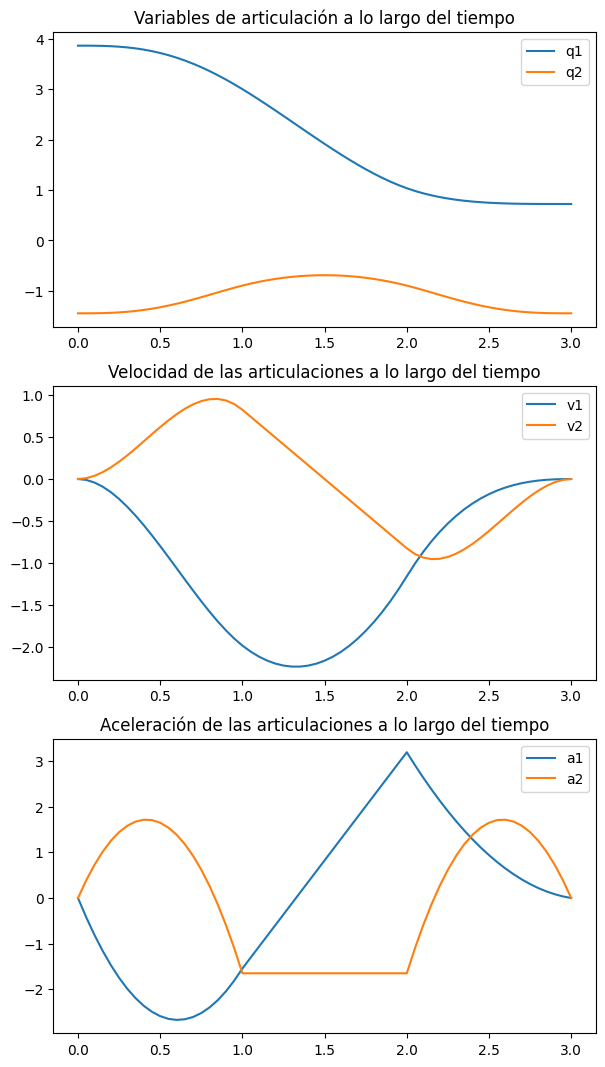

In [9]:
tiempo = np.arange(0,3+T,T)

#Si a polyder se le pasan los coeficientes de un polinomio y después el orden de derivada que se desea,
#devuelve los nuevos coeficientes de la derivada del polinomio original

#La primera derivada representa la velocidad
f1_1_1 = np.polyder(f1_1,1)
f2_1_1 = np.polyder(f2_1,1)
f3_1_1 = np.polyder(f3_1,1)

f1_2_1 = np.polyder(f1_2,1)
f2_2_1 = np.polyder(f2_2,1)
f3_2_1 = np.polyder(f3_2,1)

#Se da valores al polinomio de igual forma que en el ejercicio anterior
v1s = np.r_[np.polyval(f1_1_1, np.arange(0,1,T)), np.polyval(f2_1_1, np.arange(0,1,T)),
                        np.polyval(f3_1_1, np.arange(-1, T, T))]

v2s = np.r_[np.polyval(f1_2_1, np.arange(0,1,T)), np.polyval(f2_2_1, np.arange(0,1,T)),
                        np.polyval(f3_2_1, np.arange(-1, T, T))]

# v1s = np.diff(q1s,1)/T
# v2s = np.diff(q2s,1)/T

# a1s = np.diff(q1s,2)/T
# a2s = np.diff(q2s,2)/T

#Con la aceleración se hace de forma análoga pero con la segunda derivada
f1_1_2 = np.polyder(f1_1,2)
f2_1_2 = np.polyder(f2_1,2)
f3_1_2 = np.polyder(f3_1,2)

f1_2_2 = np.polyder(f1_2,2)
f2_2_2 = np.polyder(f2_2,2)
f3_2_2 = np.polyder(f3_2,2)
a1s = np.r_[np.polyval(f1_1_2, np.arange(0,1,T)), np.polyval(f2_1_2, np.arange(0,1,T)),
                        np.polyval(f3_1_2, np.arange(-1, T, T))]

a2s = np.r_[np.polyval(f1_2_2, np.arange(0,1,T)), np.polyval(f2_2_2, np.arange(0,1,T)),
                        np.polyval(f3_2_2, np.arange(-1, T, T))]

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(7, 13))
# ax1.plot(np.linspace(0,3,len(q1s)),q1s)
# ax1.plot(np.linspace(0,3,len(q2s)),q2s)
# ax2.plot(np.linspace(0,3,len(v1s)),v1s)
# ax2.plot(np.linspace(0,3,len(v2s)),v2s)
# ax3.plot(np.linspace(0,3,len(a1s)),a1s)
# ax3.plot(np.linspace(0,3,len(a2s)),a2s)

#Se imprimen tres gráficos con cada representación pedida
ax1.set_title("Variables de articulación a lo largo del tiempo")
ax1.plot(tiempo,q1s, label="q1")
ax1.plot(tiempo,q2s, label="q2")
ax1.legend()

ax2.set_title("Velocidad de las articulaciones a lo largo del tiempo")
ax2.plot(tiempo,v1s, label="v1")
ax2.plot(tiempo,v2s, label="v2")
ax2.legend()

ax3.set_title("Aceleración de las articulaciones a lo largo del tiempo")
ax3.plot(tiempo,a1s, label="a1")
ax3.plot(tiempo,a2s, label="a2")
ax3.legend()

plt.show()
